<a href="https://colab.research.google.com/github/sunhuanhuan920/ECE1513/blob/main/ECE1513_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Zhenhuan Sun

Student ID: 1004430555

Notebook link: https://colab.research.google.com/drive/1Ox1blb3emzxItHj3l4MMf-bN_dXM5K5R?usp=sharing



# Data preparation

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer

In [3]:
def load_and_split_data(filename):

    # Load the dataset
    df = pd.read_csv(filename)

    # Fill missing values with 0
    df = df.fillna(0)

    # Separte labels from dataset
    X = df.drop(columns=['Dataset'])
    y = df['Dataset']
    # Convert labels from 1 for liver patient and 2 for non-liver patient
    # to 0 for non-liver patient and 1 for liver patient
    y = y.map({1: 1, 2: 0})

    # Extract feature names for future use
    feature_names = X.columns.tolist()

    # Convert gender feature to numeric value using a dictionary
    X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

    # Convert to numpy arrays
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

    return X_train, X_test, y_train, y_test, feature_names

# Function to standardize the data
def standardize_data(X_train, X_test):
    # Initialize a standard scaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and test data
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.transform(X_test)

    return X_train_standardized, X_test_standardized

# Function to normalize the data
def normalize_data(X_train, X_test):
    # Initialize a normalizer
    normalizer = Normalizer()

    # Normalize both training and test data
    X_train_normalized = normalizer.fit_transform(X_train)
    X_test_normalized = normalizer.transform(X_test)

    return X_train_normalized, X_test_normalized

In [4]:
# Dataset file path
dataset_filepath = '/content/drive/MyDrive/Colab Notebooks/ECE1513/indian_liver_patient.csv'

# Data splitting and extract feature names for future use
X_train, X_test, y_train, y_test, feature_names = load_and_split_data(dataset_filepath)

# Standardize training and test data
X_train_standardized, X_test_standardized = standardize_data(X_train, X_test)

# Normalize training and test data
X_train_normalized, X_test_normalized = normalize_data(X_train, X_test)

In [5]:
print("Original Training Data:")
print(np.array_str(X_train, precision=3, suppress_small=True))
print("\nStandardized Training Data:")
print(np.array_str(X_train_standardized, precision=3, suppress_small=True))
print("\nNormalized Training Data:")
print(np.array_str(X_train_normalized, precision=3, suppress_small=True))

Original Training Data:
[[49.   0.   0.8 ...  6.6  3.6  1.2]
 [21.   1.   0.7 ...  6.4  3.3  1. ]
 [38.   1.   0.7 ...  7.   3.5  1. ]
 ...
 [42.   0.   0.8 ...  7.2  3.9  1.1]
 [32.   0.   0.6 ...  6.   3.   1. ]
 [40.   1.   3.9 ...  6.7  3.8  1.3]]

Standardized Training Data:
[[ 0.308 -1.743 -0.421 ...  0.099  0.562  0.747]
 [-1.43   0.574 -0.439 ... -0.084  0.186  0.147]
 [-0.375  0.574 -0.439 ...  0.466  0.437  0.147]
 ...
 [-0.126 -1.743 -0.421 ...  0.649  0.939  0.447]
 [-0.747 -1.743 -0.456 ... -0.451 -0.191  0.147]
 [-0.25   0.574  0.122 ...  0.191  0.814  1.047]]

Normalized Training Data:
[[0.293 0.    0.005 ... 0.039 0.022 0.007]
 [0.148 0.007 0.005 ... 0.045 0.023 0.007]
 [0.089 0.002 0.002 ... 0.016 0.008 0.002]
 ...
 [0.222 0.    0.004 ... 0.038 0.021 0.006]
 [0.173 0.    0.003 ... 0.032 0.016 0.005]
 [0.022 0.001 0.002 ... 0.004 0.002 0.001]]


# Model

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FullyConnectedNN, self).__init__()
        # Creating the hidden layers
        layers = []
        for i in range(len(hidden_sizes)):
            if i == 0:
                layers.append(nn.Linear(input_size, hidden_sizes[i]))
            else:
                layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            # ReLU activation for all hidden layers
            layers.append(nn.ReLU())

        self.hidden_layers = nn.Sequential(*layers)

        # Output layer with Sigmoid activation
        self.output_layer = nn.Sequential(
            nn.Linear(hidden_sizes[-1], output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        activations = self.hidden_layers(x)
        outputs = self.output_layer(activations)
        return outputs

In [8]:
# An example model with two layers, one has 32 neurons and the other one has
# 64 neurons
input_size = 10  # feature dimensionality
hidden_sizes = [32, 64]  # hidden layer sizes
output_size = 1  # Binary classification with BCE

model_test = FullyConnectedNN(input_size, hidden_sizes, output_size)

print(model_test)

FullyConnectedNN(
  (hidden_layers): Sequential(
    (0): Linear(in_features=10, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
  )
  (output_layer): Sequential(
    (0): Linear(in_features=64, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [9]:
# Binary Cross Entropy Loss
# It is designed to work with a single probability value
loss_function = nn.BCELoss()
print(loss_function)

BCELoss()


In [10]:
# Adam optimizer with learning rate 0.001
optimizer = optim.Adam(model_test.parameters(), lr=0.001)
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


# Training and evaluation (a)

I have done the following three things for this question:

1. I implemented a function
```
def train_and_evaluate(input_size, hidden_layer_options, output_size, X_train, y_train, X_test, y_test, model_save_path, learning_rate=0.001, epochs=500)
```
which trains and evaluates models with different hidden layer options. Except for different hidden layers settings, each model is trained over 500 epochs and evaluated via accuracy and weighted F1 score performance. During the training and evaluation, the model (architecture and parameters) demonstrating the most balanced generalization capability on both classes, as indicated by achieving the highest weighted F1 score on the test set, is saved for future use.


2. After training and evaluation, the performance of models with different hidden layers settings is visualized. This is done by function
```
plot_performances(results)
```
 which plots models' recorded accuracy and weighted F1 scores on both the training and testing datasets over the entire span of training epochs.

3. I further showcase the test set performance of the best model, selected from all hidden layers settings and across all epochs, using function
```
def evaluate_model_on_testset(model_path, X_test, y_test)
```





In [11]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import itertools

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


**1**

In [13]:
# Function to train and evaluate models with different hyperparameter settings
# for fine-tuning purpose
def train_and_evaluate(input_size, hidden_layer_options, output_size, X_train, y_train, X_test, y_test, model_save_path, learning_rate=0.001, epochs=500):

    # Store the relavant performance measures acorss all training epochs for
    # all possible settings in hidden_layer_options.
    results = {}

    best_f1_score = 0
    best_model_params = None

    for hidden_sizes in hidden_layer_options:

        print(f"Training and evaluating model with hidden layer sizes: {hidden_sizes}")

        model = FullyConnectedNN(input_size, hidden_sizes, output_size)
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        loss_function = nn.BCELoss()

        # Convert data to tensors
        X_train_tensor = torch.FloatTensor(X_train)
        # Reshapes the tensor into a two-dimensional tensor with one column and
        # as many rows as necessary to maintain the same number of elements
        y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
        X_test_tensor = torch.FloatTensor(X_test)
        y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

        # Create dataloaders
        train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
        test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

        # Record the performance measures
        history = {'train_acc': [], 'test_acc': [], 'train_f1': [], 'test_f1': []}

        for epoch in range(epochs):

            model.train()

            # Train the model
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = loss_function(outputs, labels)

                # Set all of the gradients for the parameters of the model to zero
                # since gradients accumulate by default whenever backward() is called
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            model.eval()

            # Evaluate the model on the training set
            train_preds, train_labels = [], []
            with torch.no_grad():
                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    # Reshapes the predictions and target tensor (preds and labels)
                    # over all batches into a one-dimensional tensor, and convert
                    # and aggregatate them to list. So that we can use accuracy_score
                    # and f1_score function directly.
                    train_preds.extend(outputs.view(-1).tolist())
                    train_labels.extend(labels.view(-1).tolist())

            # Calculate training performance
            # Use probability in outputs to decide the class based on a threshold (0.5)
            train_acc = accuracy_score(train_labels, np.round(train_preds))
            train_f1 = f1_score(train_labels, np.round(train_preds), average='weighted')

            # Evaluate the model on the testing set
            test_preds, test_labels = [], []
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    test_preds.extend(outputs.view(-1).tolist())
                    test_labels.extend(labels.view(-1).tolist())

            # Calculate testing performance
            test_acc = accuracy_score(test_labels, np.round(test_preds))
            test_f1 = f1_score(test_labels, np.round(test_preds), average='weighted')

            # Store performance data
            history['train_acc'].append(train_acc)
            history['test_acc'].append(test_acc)
            history['train_f1'].append(train_f1)
            history['test_f1'].append(test_f1)

            # Check if the current model's performance is better than all previous models
            if test_f1 > best_f1_score:
                best_f1_score = test_f1  # Update the best F1 score
                best_model_params = {
                    'state_dict': model.state_dict(),
                    'input_size': input_size,
                    'hidden_sizes': hidden_sizes,
                    'output_size': output_size
                }  # Save the model parameters and architecture details

                torch.save(best_model_params, model_save_path)

            # print(f"Epoch {epoch+1}/{epochs} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}")

        # Store results for this architecture
        results[str(hidden_sizes)] = history

        print(f"Done!\n")

    return results

In [54]:
input_size = 10  # Feature dimensionality
output_size = 1  # Binary classification with BCE

layer_options = [1, 2, 3]  # Number of layers to try
neuron_options = [32, 64]  # Number of neuron options for each layer

hidden_layer_options = []

# Generate all possible combinations of layer depths and neuron counts
for layers in layer_options:
    # Start with a single layer of neurons
    if layers == 1:
        for neurons in neuron_options:
            hidden_layer_options.append([neurons])
    # For more than one layer, create combinations
    else:
        for neurons_combination in itertools.product(neuron_options, repeat=layers):
            # print(list(neurons_combination))
            hidden_layer_options.append(list(neurons_combination))

# print(hidden_layer_options)

results = train_and_evaluate(
    input_size, hidden_layer_options, output_size,
    X_train, y_train, X_test, y_test, 'best_model.pth'
)

Training and evaluating model with hidden layer sizes: [32]
Done!

Training and evaluating model with hidden layer sizes: [64]
Done!

Training and evaluating model with hidden layer sizes: [32, 32]
Done!

Training and evaluating model with hidden layer sizes: [32, 64]
Done!

Training and evaluating model with hidden layer sizes: [64, 32]
Done!

Training and evaluating model with hidden layer sizes: [64, 64]
Done!

Training and evaluating model with hidden layer sizes: [32, 32, 32]
Done!

Training and evaluating model with hidden layer sizes: [32, 32, 64]
Done!

Training and evaluating model with hidden layer sizes: [32, 64, 32]
Done!

Training and evaluating model with hidden layer sizes: [32, 64, 64]
Done!

Training and evaluating model with hidden layer sizes: [64, 32, 32]
Done!

Training and evaluating model with hidden layer sizes: [64, 32, 64]
Done!

Training and evaluating model with hidden layer sizes: [64, 64, 32]
Done!

Training and evaluating model with hidden layer sizes: [6

**2**

In [55]:
def plot_performances(results):
    # Iterate through each hyperparameter setting and create separate plots
    for hidden_sizes, history in results.items():
        epochs_range = range(1, len(history['train_acc']) + 1)

        # Plot for accuracy
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, history['train_acc'], label='Train Accuracy')
        plt.plot(epochs_range, history['test_acc'], label='Test Accuracy')
        plt.title(f'hidden layers {hidden_sizes}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.legend()

        # Plot for F1 score
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, history['train_f1'], label='Train F1 Score')
        plt.plot(epochs_range, history['test_f1'], label='Test F1 Score')
        plt.title(f'hidden layers {hidden_sizes}')
        plt.xlabel('Epoch')
        plt.ylabel('Weighted F1 Score')
        plt.ylim(0, 1)
        plt.legend()

        plt.tight_layout()
        plt.show()

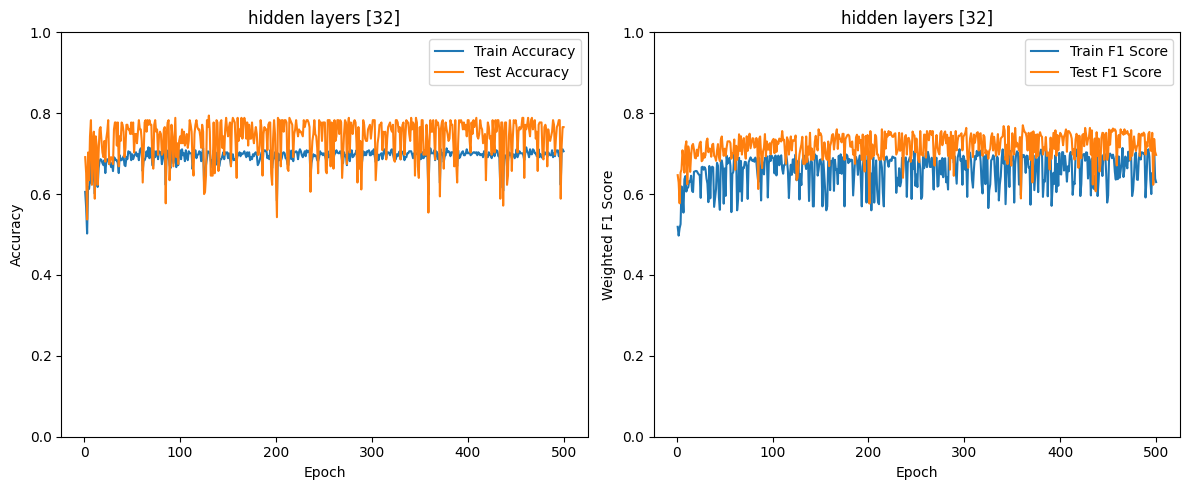

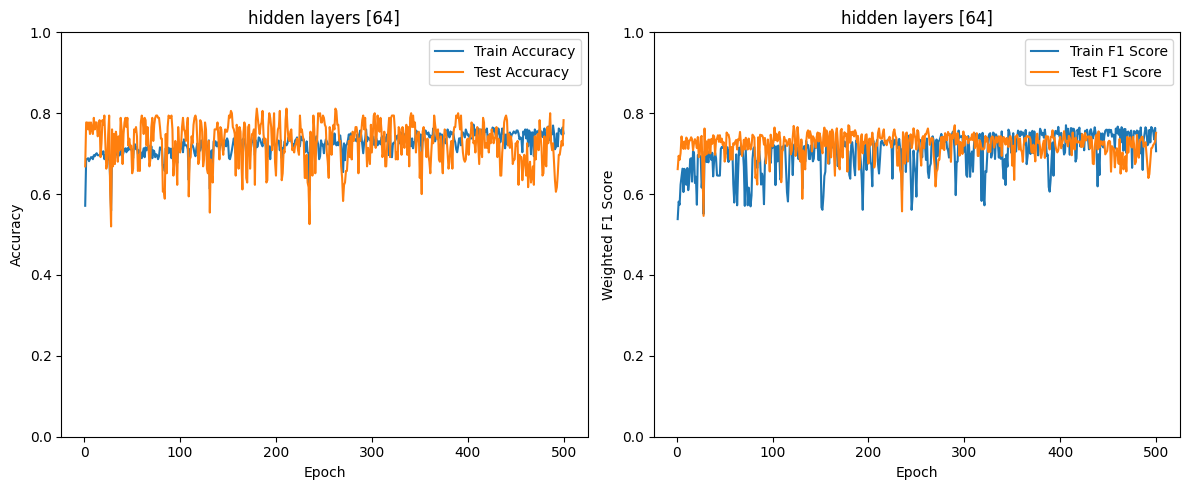

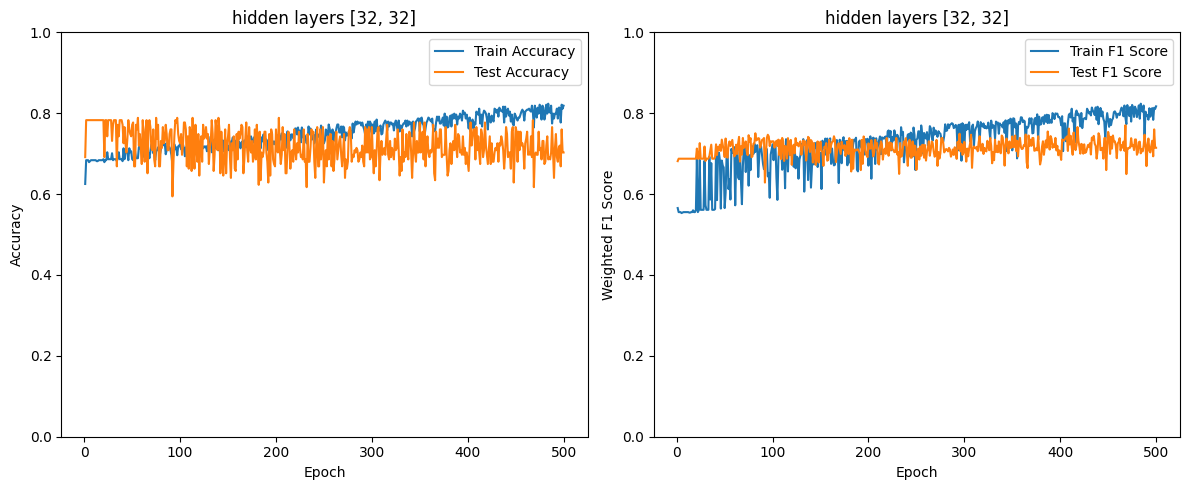

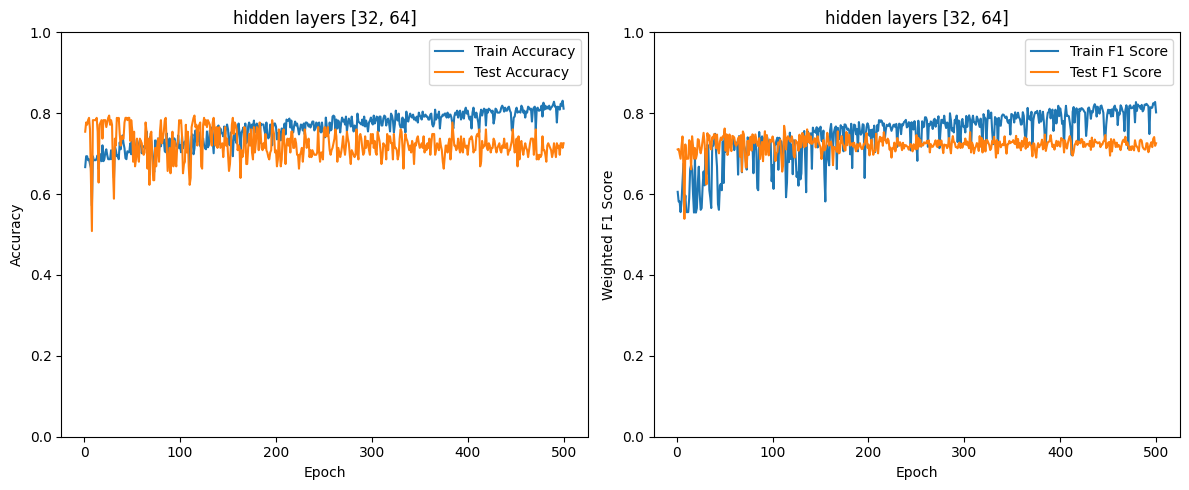

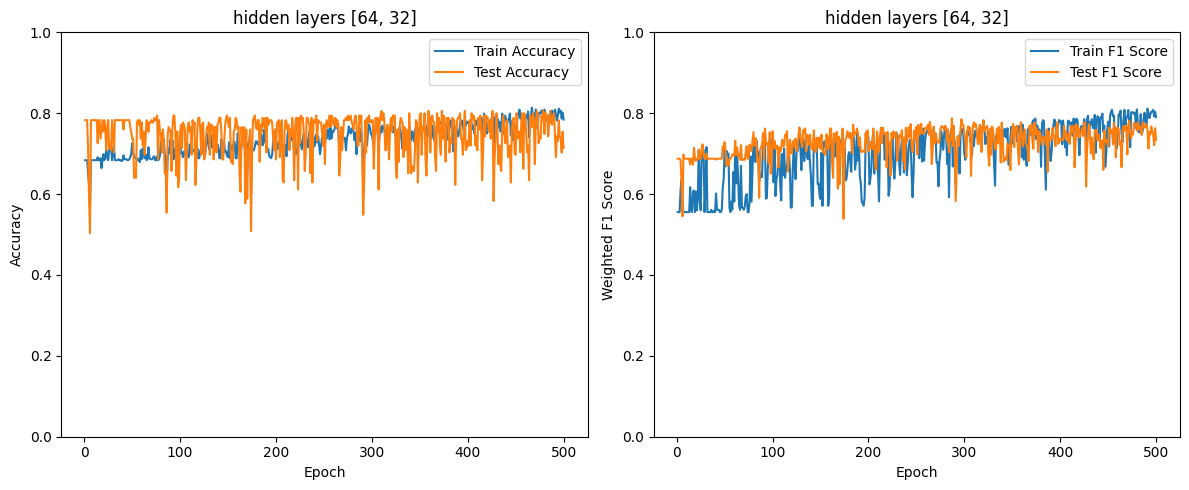

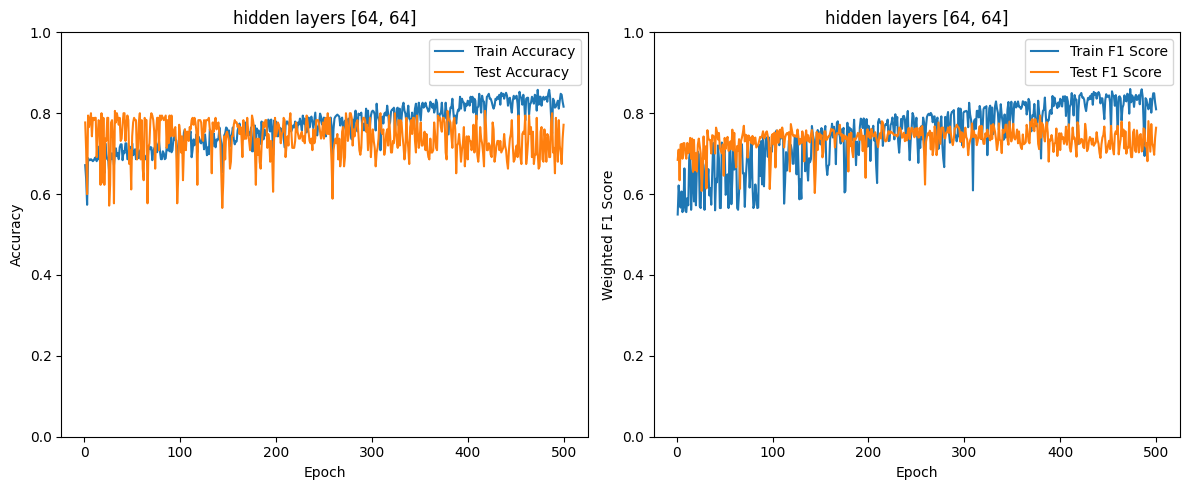

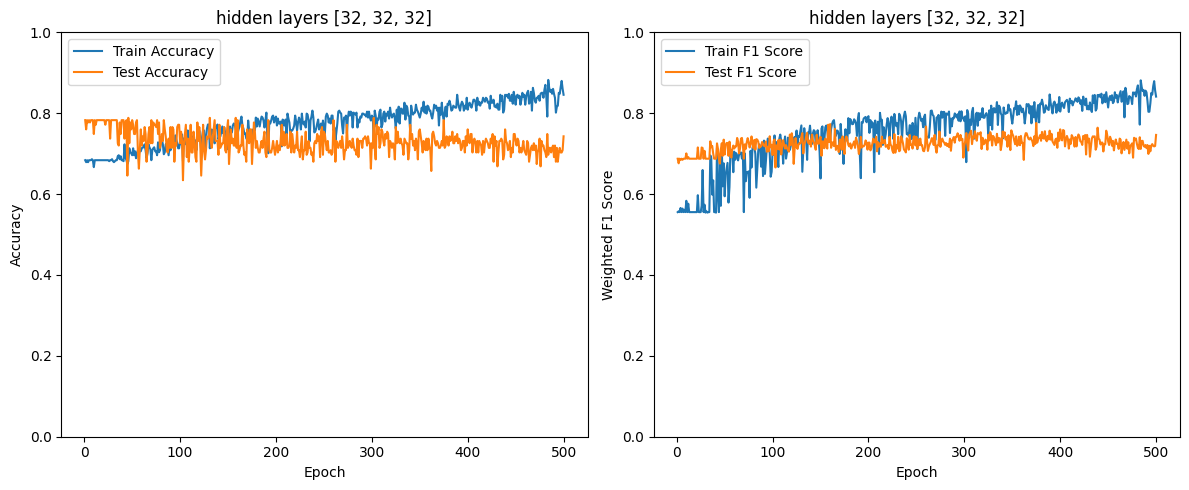

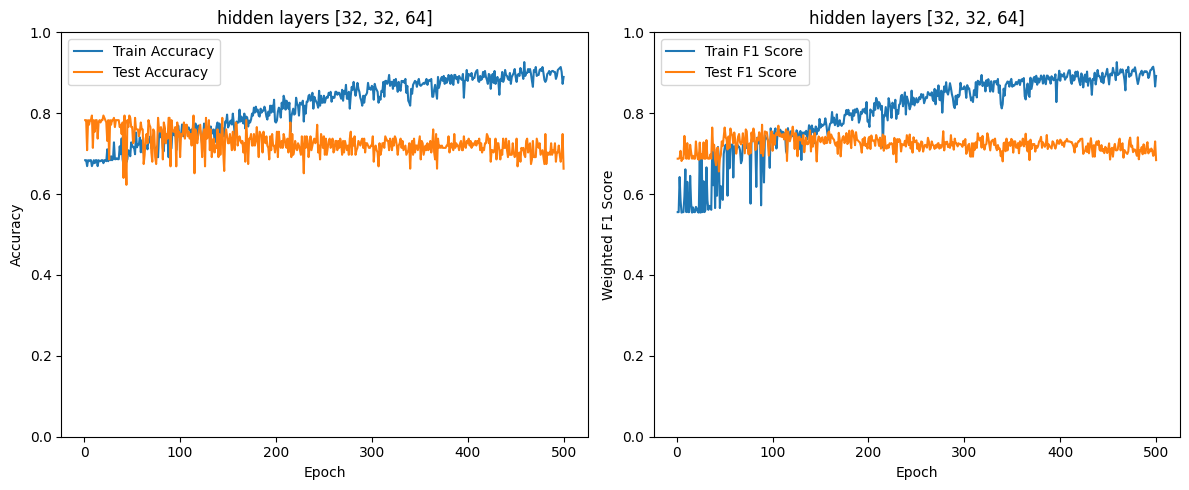

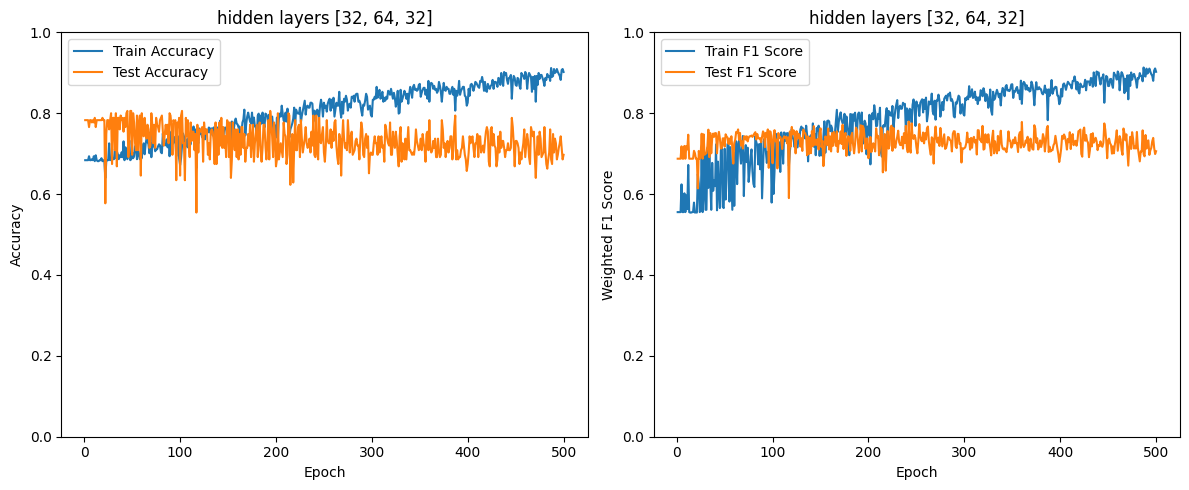

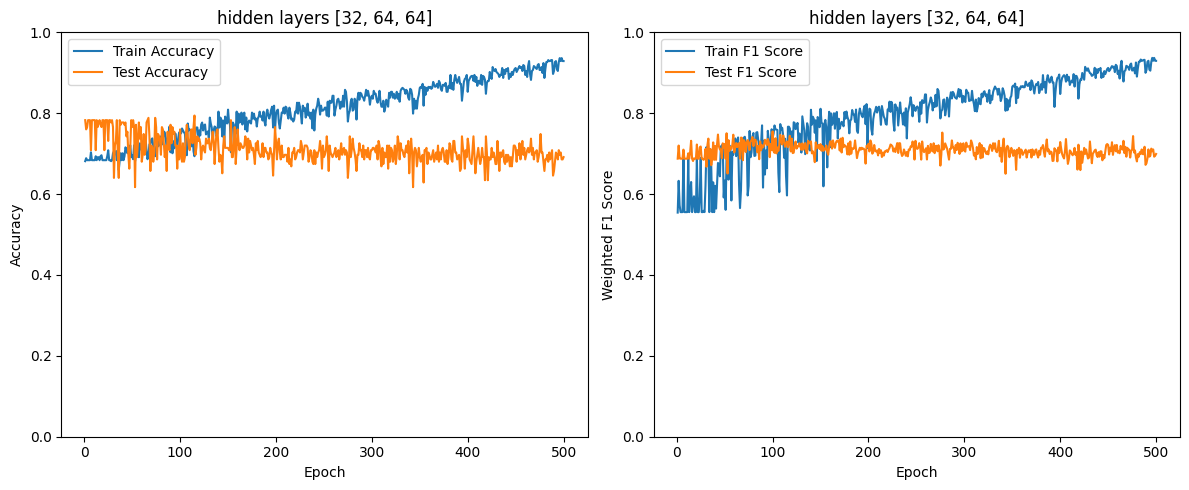

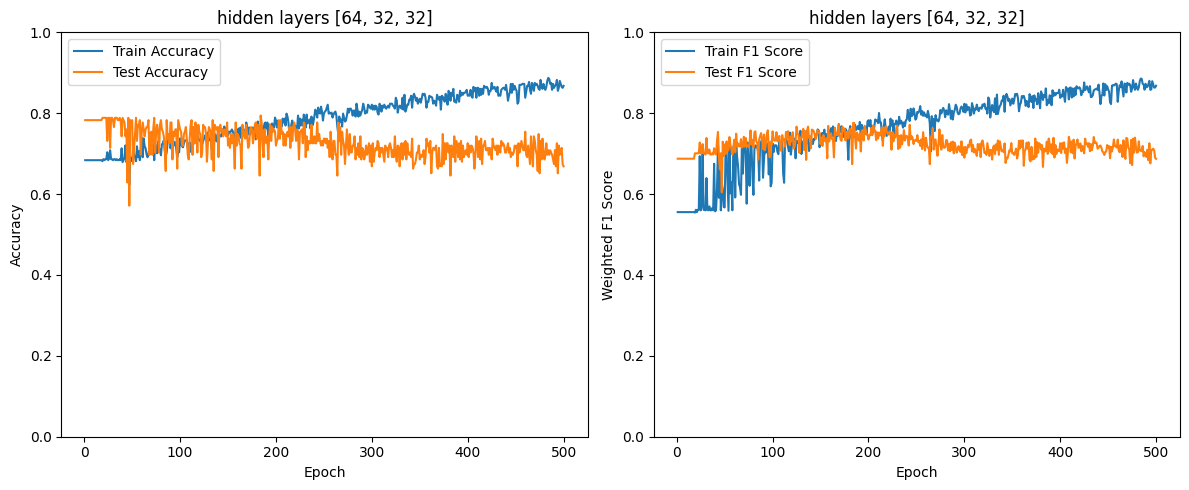

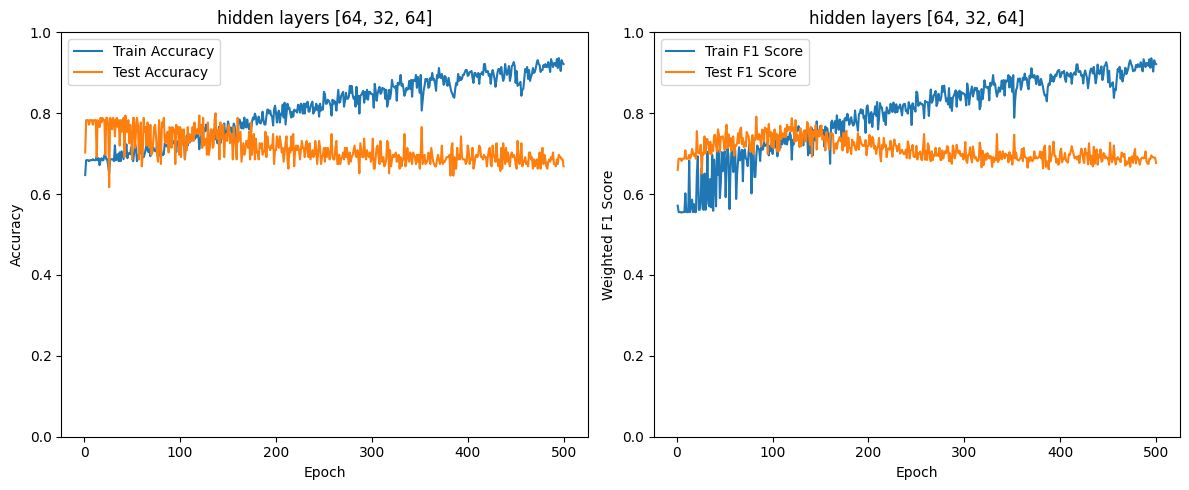

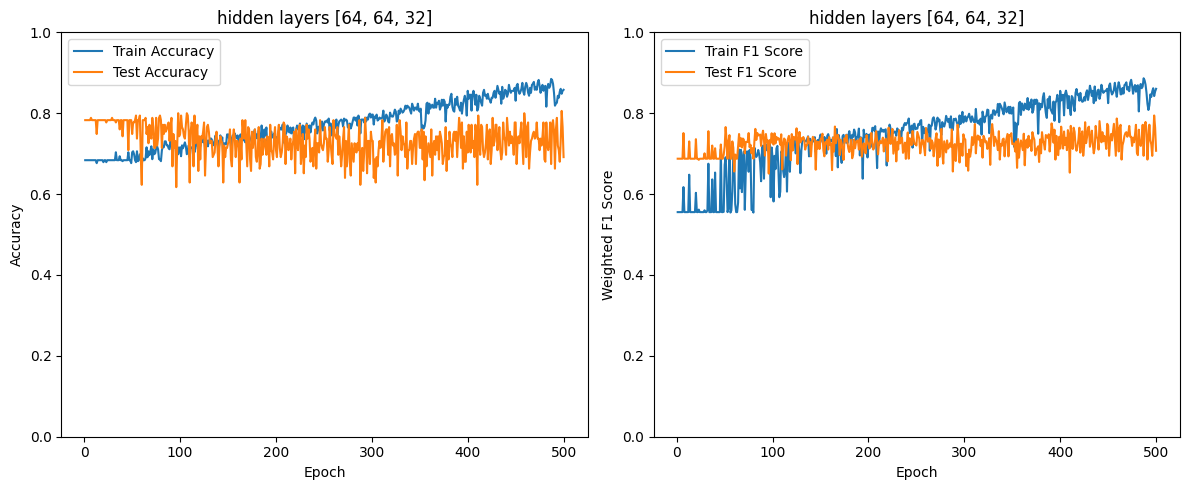

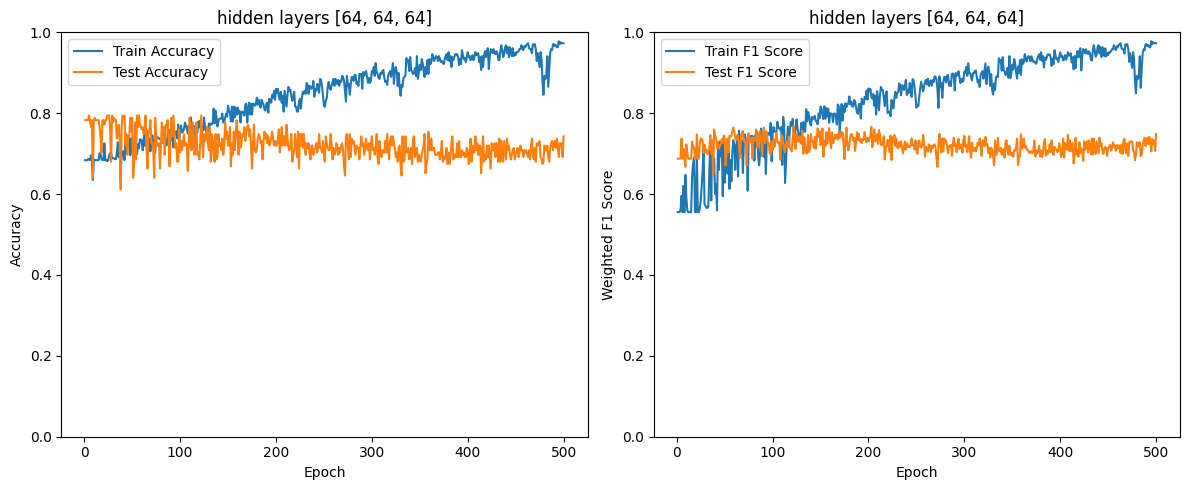

In [56]:
plot_performances(results)

I have found that adding more layers and increasing the number of neurons per layer generally improves the model's training accuracy and weighted F1 score. The greater the number of layers and neurons, the higher the training performance. However, the testing performance does not show drastic changes across models that have different numbers of layers and neurons. This pattern indicates that incorporating more layers and neurons in model architecture tends to lead to overfitting for this small and inbalanced dataset. Thus, deep learning is not worth it in this case.

**3**

In [57]:
def evaluate_model_on_testset(model_path, X_test, y_test):

    # Load the dictionary containing the architecture and the state dict
    saved_model_info = torch.load(model_path)

    print("Best model hidden layers settings: {}\n".format(saved_model_info['hidden_sizes']))

    # Recreate the model using the saved architecture details
    model = FullyConnectedNN(saved_model_info['input_size'],
                            saved_model_info['hidden_sizes'],
                            saved_model_info['output_size'])

    # Load the state dictionary into the model
    model.load_state_dict(saved_model_info['state_dict'])

    model.to(device)

    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test).view(-1, 1)
    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

    model.eval()

    # Class 0 for Non-Liver Patient and Class 1 for Liver Patient
    classes = ['Non-Liver Patient', 'Liver Patient']
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    all_labels = []
    all_preds = []

    # Evaluate the model on the testing set
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            # Apply the threshold (0.5) to the output probabilities to get the predictions
            preds = (outputs >= 0.5).int()
            preds = preds.view(-1)

            # Count correct predictions for each class
            correct = preds.eq(labels.view_as(preds))
            correct = correct.cpu().numpy()
            for i in range(labels.size(0)):
                label = labels.data[i].item()
                class_correct[label] += correct[i].item()
                class_total[label] += 1

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())


    # Print accuracy for each class
    for i in range(len(classes)):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                classes[i], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('Test Accuracy (Overall): %2d%% (%2d/%2d)\n' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

    for i, class_name in enumerate(classes):
        f1 = f1_score(all_labels, all_preds, pos_label=i)
        print('F1 Score for %s: %.6f' % (class_name, f1))

    weighted_f1 = f1_score(all_labels, all_preds, average='weighted')
    print('Weighted F1 Score: {:.6f}\n'.format(weighted_f1))

    print(classification_report(all_labels, all_preds, target_names=classes, digits=6))

In [58]:
# Evaluate the best model on test set
evaluate_model_on_testset('best_model.pth', X_test, y_test)

Best model hidden layers settings: [64, 64]

Test Accuracy of Non-Liver Patient: 42% (16/38)
Test Accuracy of Liver Patient: 91% (125/137)
Test Accuracy (Overall): 80% (141/175)

F1 Score for Non-Liver Patient: 0.484848
F1 Score for Liver Patient: 0.880282
Weighted F1 Score: 0.794416

                   precision    recall  f1-score   support

Non-Liver Patient   0.571429  0.421053  0.484848        38
    Liver Patient   0.850340  0.912409  0.880282       137

         accuracy                       0.805714       175
        macro avg   0.710884  0.666731  0.682565       175
     weighted avg   0.789776  0.805714  0.794416       175



# Training and evaluation (b)

**Without normalization and standardization**

Training and evaluating model with hidden layer sizes: [64, 64]
Done!

Best model hidden layers settings: [64, 64]

Test Accuracy of Non-Liver Patient: 42% (16/38)
Test Accuracy of Liver Patient: 88% (121/137)
Test Accuracy (Overall): 78% (137/175)

F1 Score for Non-Liver Patient: 0.457143
F1 Score for Liver Patient: 0.864286
Weighted F1 Score: 0.775878

                   precision    recall  f1-score   support

Non-Liver Patient   0.500000  0.421053  0.457143        38
    Liver Patient   0.846154  0.883212  0.864286       137

         accuracy                       0.782857       175
        macro avg   0.673077  0.652132  0.660714       175
     weighted avg   0.770989  0.782857  0.775878       175



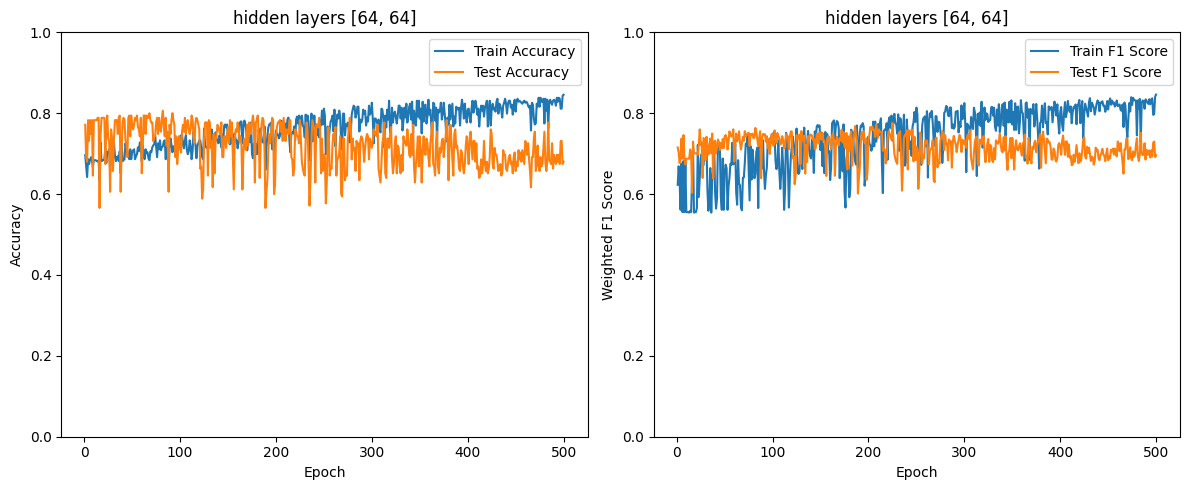

In [60]:
# Use the model architecture of the best model obtained in part (a)
saved_model_info = torch.load('best_model.pth')

input_size = saved_model_info['input_size']
hidden_sizes = saved_model_info['hidden_sizes']
output_sizes = saved_model_info['output_size']

hidden_layer_options = [hidden_sizes]

# Retrain the best model without normalization and standardization
results_plain = train_and_evaluate(
    input_size, hidden_layer_options, output_size,
    X_train, y_train, X_test, y_test, 'model_5b_plain.pth'
)

evaluate_model_on_testset('model_5b_plain.pth', X_test, y_test)

plot_performances(results_plain)

**With normalization**

Training and evaluating model with hidden layer sizes: [64, 64]
Done!

Best model hidden layers settings: [64, 64]

Test Accuracy of Non-Liver Patient: 36% (14/38)
Test Accuracy of Liver Patient: 89% (123/137)
Test Accuracy (Overall): 78% (137/175)

F1 Score for Non-Liver Patient: 0.424242
F1 Score for Liver Patient: 0.866197
Weighted F1 Score: 0.770230

                   precision    recall  f1-score   support

Non-Liver Patient   0.500000  0.368421  0.424242        38
    Liver Patient   0.836735  0.897810  0.866197       137

         accuracy                       0.782857       175
        macro avg   0.668367  0.633116  0.645220       175
     weighted avg   0.763615  0.782857  0.770230       175



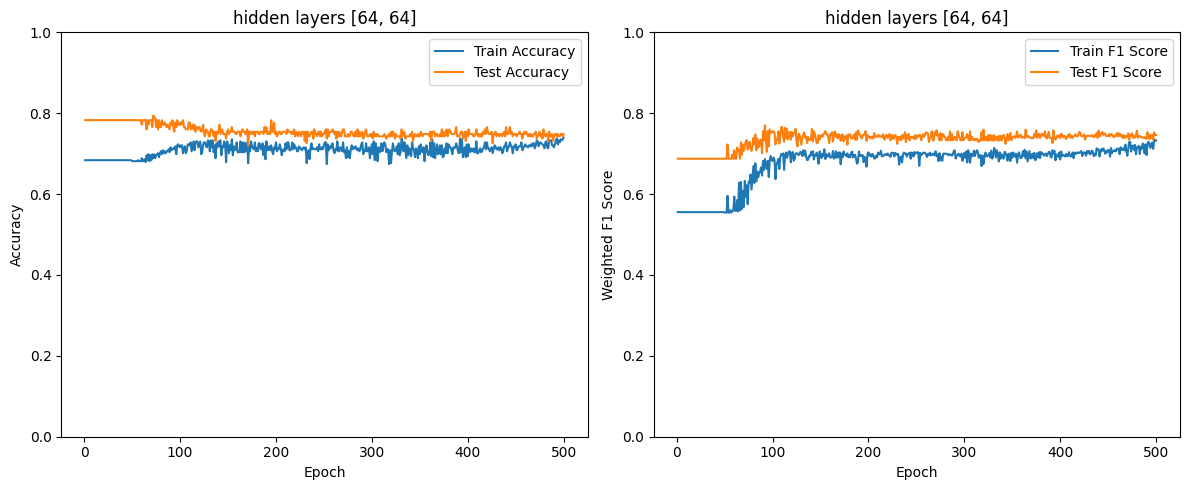

In [64]:
results_normalization = train_and_evaluate(
    input_size, hidden_layer_options, output_size,
    X_train_normalized, y_train, X_test_normalized, y_test, 'model_5b_normalization.pth'
)

evaluate_model_on_testset('model_5b_normalization.pth', X_test_normalized, y_test)

plot_performances(results_normalization)

**With standardization**

Training and evaluating model with hidden layer sizes: [64, 64]
Done!

Best model hidden layers settings: [64, 64]

Test Accuracy of Non-Liver Patient: 36% (14/38)
Test Accuracy of Liver Patient: 94% (129/137)
Test Accuracy (Overall): 81% (143/175)

F1 Score for Non-Liver Patient: 0.466667
F1 Score for Liver Patient: 0.889655
Weighted F1 Score: 0.797806

                   precision    recall  f1-score   support

Non-Liver Patient   0.636364  0.368421  0.466667        38
    Liver Patient   0.843137  0.941606  0.889655       137

         accuracy                       0.817143       175
        macro avg   0.739750  0.655013  0.678161       175
     weighted avg   0.798238  0.817143  0.797806       175



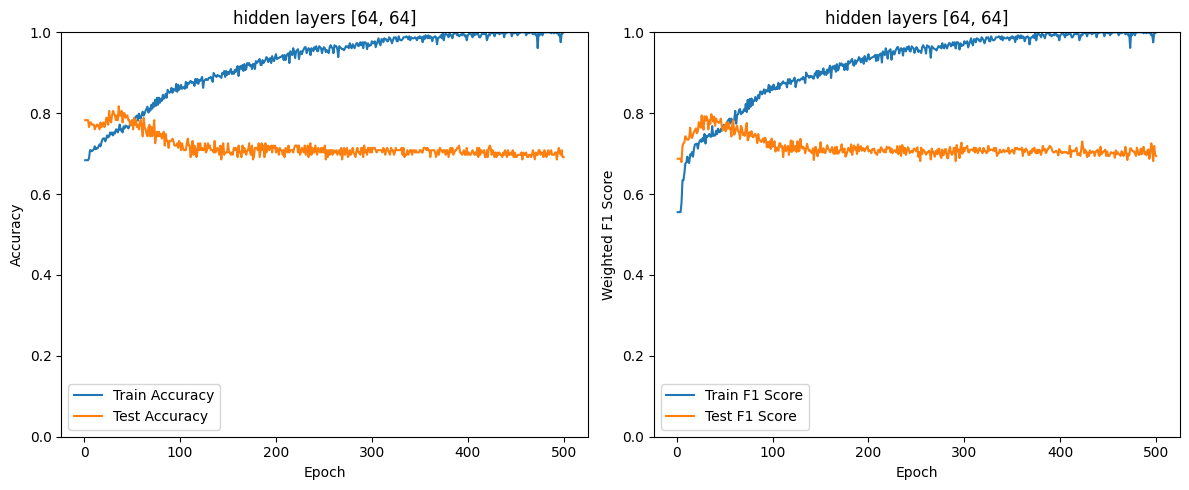

In [62]:
results_standardization = train_and_evaluate(
    input_size, hidden_layer_options, output_size,
    X_train_standardized, y_train, X_test_standardized, y_test, 'model_5b_standardization.pth'
)

evaluate_model_on_testset('model_5b_standardization.pth', X_test_standardized, y_test)

plot_performances(results_standardization)

Compared to the model trained without normalization or standardization, I have found through experiments that, preprocessing the data through normalization or standardization prior to training does not always lead to enhancements or declines in testing performance in terms of accuracy and weighted F1 score. Models trained with these preprocessing techniques generally exhibit test performance comparable to models trained without such techniques, with occasional cases of better or worse testing performance.

Thus, the use of standardization and normalization during neural network training for this dataset is not strictly necessary. Nonetheless, I found that standardizing the data prior to training yields better testing performance more often than either normalization or omitting preprocessing. Therefore, I have decided to proceed with standardization in the subsequent questions.

# Training and evaluation (c)

In [65]:
# Use the model architecture of the best model obtained in part (a)
saved_model_info = torch.load('best_model.pth')

input_size = saved_model_info['input_size']
hidden_sizes = saved_model_info['hidden_sizes']
output_sizes = saved_model_info['output_size']

hidden_layer_options = [hidden_sizes]

**Learning rate = 0.1**

Training and evaluating model with hidden layer sizes: [64, 64]
Done!

Best model hidden layers settings: [64, 64]

Test Accuracy of Non-Liver Patient: 10% ( 4/38)
Test Accuracy of Liver Patient: 99% (136/137)
Test Accuracy (Overall): 80% (140/175)

F1 Score for Non-Liver Patient: 0.186047
F1 Score for Liver Patient: 0.885993
Weighted F1 Score: 0.734005

                   precision    recall  f1-score   support

Non-Liver Patient   0.800000  0.105263  0.186047        38
    Liver Patient   0.800000  0.992701  0.885993       137

         accuracy                       0.800000       175
        macro avg   0.800000  0.548982  0.536020       175
     weighted avg   0.800000  0.800000  0.734005       175



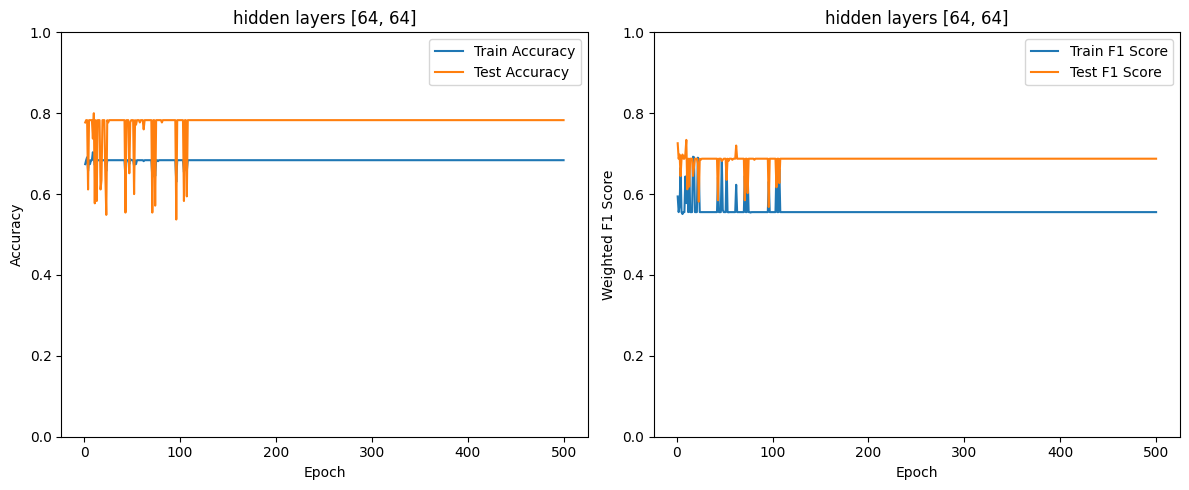

In [66]:
results_lr_01 = train_and_evaluate(
    input_size, hidden_layer_options, output_size,
    X_train_standardized, y_train, X_test_standardized, y_test,
    'model_5c_lr_01.pth', learning_rate=0.1
)

evaluate_model_on_testset('model_5c_lr_01.pth', X_test_standardized, y_test)

plot_performances(results_lr_01)

We can see from the plot that the model stopped learning after reaching certain epoch when the learning rate was set to 0.1. This suggests that when the learning rate is too high, the optimizer may make very large updates to the weights, leading to rapid convergence to a suboptimal solution in a local minimum early in the training process. After that, the model gets stuck in the local minimum due to gradients become very small or even zero, and thus the model fails to improve.

However, despite poor performance of large learning rate in our training process, a properly chosen, relatively large learning rate can lead to faster convergence during the early stages of training a neural network.

**Learning rate = 0.000001**

Training and evaluating model with hidden layer sizes: [64, 64]
Done!

Best model hidden layers settings: [64, 64]

Test Accuracy of Non-Liver Patient: 26% (10/38)
Test Accuracy of Liver Patient: 82% (113/137)
Test Accuracy (Overall): 70% (123/175)

F1 Score for Non-Liver Patient: 0.277778
F1 Score for Liver Patient: 0.812950
Weighted F1 Score: 0.696741

                   precision    recall  f1-score   support

Non-Liver Patient   0.294118  0.263158  0.277778        38
    Liver Patient   0.801418  0.824818  0.812950       137

         accuracy                       0.702857       175
        macro avg   0.547768  0.543988  0.545364       175
     weighted avg   0.691262  0.702857  0.696741       175



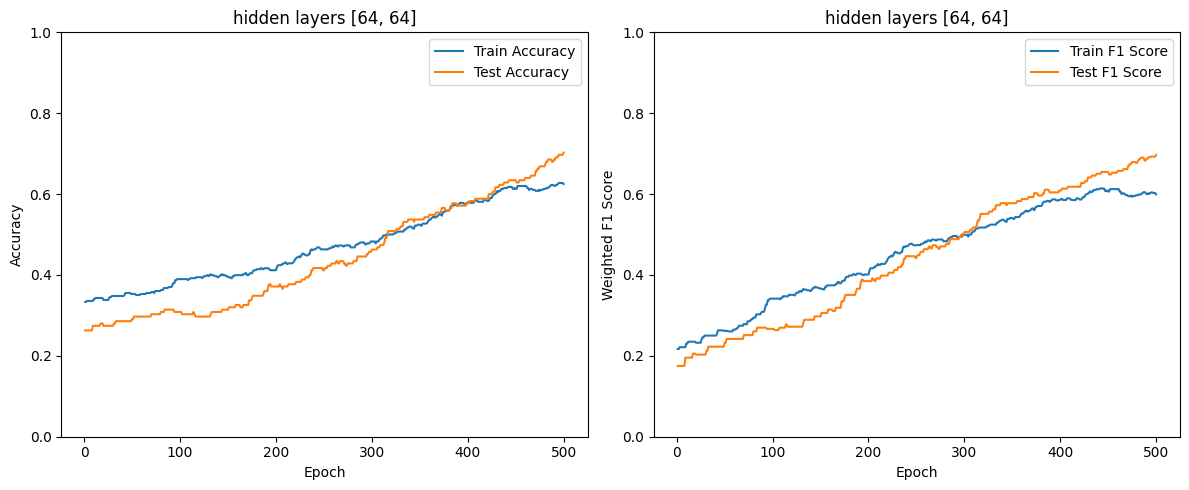

In [72]:
results_lr_0000001 = train_and_evaluate(
    input_size, hidden_layer_options, output_size,
    X_train_standardized, y_train, X_test_standardized,
    y_test, 'model_5c_lr_0000001.pth', learning_rate=0.000001
)

evaluate_model_on_testset('model_5c_lr_0000001.pth', X_test_standardized, y_test)

plot_performances(results_lr_0000001)

We can see from the plot that the model was updating very slowly over epochs when the learning rate was set to 0.000001. Using a small learning rate can be advantageous when the model is approaching the global optimum, as it allows for more fine-grained weight updates, which can prevent overshooting the target. However, if the learning rate is too small from the start of training, it could result in slow convergence or the model getting stuck in local minima, due to the extremely small updates.

**Learning rate scheduler**

In [73]:
from torch.optim.lr_scheduler import StepLR

In [74]:
# Function to train and evaluate model with learning rate scheduling
def train_and_evaluate_lr_scheduler(input_size, hidden_layer_options, output_size, X_train, y_train, X_test, y_test, model_save_path, learning_rate=0.001, epochs=500):

    # Store the relavant performance measures acorss all training epochs for
    # all possible settings in hidden_layer_options.
    results = {}

    best_f1_score = 0
    best_model_params = None

    for hidden_sizes in hidden_layer_options:

        print(f"Training and evaluating model with hidden layer sizes: {hidden_sizes}")

        model = FullyConnectedNN(input_size, hidden_sizes, output_size)
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        loss_function = nn.BCELoss()

        # Define the learning rate scheduler
        # Learning rate will be decayed every 100 epochs and the new learning
        # rate will be 30% of the current learning rate at each decay step.
        scheduler = StepLR(optimizer, step_size=100, gamma=0.3)

        # Convert data to tensors
        X_train_tensor = torch.FloatTensor(X_train)
        # Reshapes the tensor into a two-dimensional tensor with one column and
        # as many rows as necessary to maintain the same number of elements
        y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
        X_test_tensor = torch.FloatTensor(X_test)
        y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

        # Create dataloaders
        train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
        test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

        # Record the performance measures
        history = {'train_acc': [], 'test_acc': [], 'train_f1': [], 'test_f1': []}

        for epoch in range(epochs):

            model.train()

            # Train the model
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = loss_function(outputs, labels)

                # Set all of the gradients for the parameters of the model to zero
                # since gradients accumulate by default whenever backward() is called
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Step the scheduler at the end of each epoch
            scheduler.step()

            model.eval()

            # Evaluate the model on the training set
            train_preds, train_labels = [], []
            with torch.no_grad():
                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    # Reshapes the predictions and target tensor (preds and labels)
                    # over all batches into a one-dimensional tensor, and convert
                    # and aggregatate them to list. So that we can use accuracy_score
                    # and f1_score function directly.
                    train_preds.extend(outputs.view(-1).tolist())
                    train_labels.extend(labels.view(-1).tolist())

            # Calculate training performance
            # Use probability in outputs to decide the class based on a threshold (0.5)
            train_acc = accuracy_score(train_labels, np.round(train_preds))
            train_f1 = f1_score(train_labels, np.round(train_preds), average='weighted')

            # Evaluate the model on the testing set
            test_preds, test_labels = [], []
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    test_preds.extend(outputs.view(-1).tolist())
                    test_labels.extend(labels.view(-1).tolist())

            # Calculate testing performance
            test_acc = accuracy_score(test_labels, np.round(test_preds))
            test_f1 = f1_score(test_labels, np.round(test_preds), average='weighted')

            # Store performance data
            history['train_acc'].append(train_acc)
            history['test_acc'].append(test_acc)
            history['train_f1'].append(train_f1)
            history['test_f1'].append(test_f1)

            # Check if the current model's performance is better than all previous models
            if test_f1 > best_f1_score:
                best_f1_score = test_f1  # Update the best F1 score
                best_model_params = {
                    'state_dict': model.state_dict(),
                    'input_size': input_size,
                    'hidden_sizes': hidden_sizes,
                    'output_size': output_size
                }  # Save the model parameters and architecture details

                torch.save(best_model_params, model_save_path)

            # print(f"Epoch {epoch+1}/{epochs} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}")

        # Store results for this architecture
        results[str(hidden_sizes)] = history
        print(f"Done!\n")

    return results

Training and evaluating model with hidden layer sizes: [64, 64]
Done!

Best model hidden layers settings: [64, 64]

Test Accuracy of Non-Liver Patient: 42% (16/38)
Test Accuracy of Liver Patient: 86% (118/137)
Test Accuracy (Overall): 76% (134/175)

F1 Score for Non-Liver Patient: 0.438356
F1 Score for Liver Patient: 0.851986
Weighted F1 Score: 0.762169

                   precision    recall  f1-score   support

Non-Liver Patient   0.457143  0.421053  0.438356        38
    Liver Patient   0.842857  0.861314  0.851986       137

         accuracy                       0.765714       175
        macro avg   0.650000  0.641183  0.645171       175
     weighted avg   0.759102  0.765714  0.762169       175



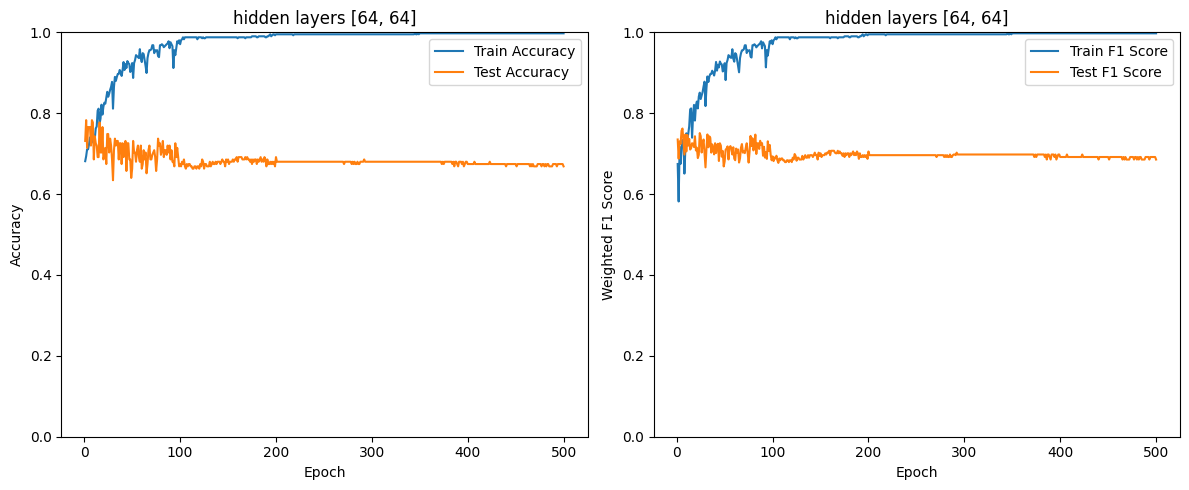

In [75]:
results_lr_scheduler = train_and_evaluate_lr_scheduler(
    input_size, hidden_layer_options, output_size,
    X_train_standardized, y_train, X_test_standardized,
    y_test, 'model_5c_lr_scheduler.pth', learning_rate=0.01
)

evaluate_model_on_testset('model_5c_lr_scheduler.pth', X_test_standardized, y_test)

plot_performances(results_lr_scheduler)

We can see from the plot that the problems we were having when using very small and very large learning rates no longer exist after we have applied learning rate scheduling. It is evident that the updates are more substantial during the initial phase of training, as shown by the large fluctuation in the training and testing performance plot. As training progresses towards completion, the updates diminish, leading to a more stable performance plot with less variation. Thus, compared to fixed learning rates, learning rate scheduling provides an efficient way to update weights at different stages of training, providing greater adaptability to the evolving needs of the model throughout its learning process.

# Training and evaluation (d)

In [80]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler

**Before balancing training set**

In [81]:
# Check the number of samples in each class.
def check_class_distribution(y):
    class_distribution = Counter(y)
    for class_label, count in class_distribution.items():
        print(f"Class {class_label}: {count} samples")

check_class_distribution(y_train)

Class 0: 129 samples
Class 1: 279 samples


Training and evaluating model with hidden layer sizes: [64, 64]
Done!

Best model hidden layers settings: [64, 64]

Test Accuracy of Non-Liver Patient: 44% (17/38)
Test Accuracy of Liver Patient: 90% (124/137)
Test Accuracy (Overall): 80% (141/175)

F1 Score for Non-Liver Patient: 0.500000
F1 Score for Liver Patient: 0.879433
Weighted F1 Score: 0.797042

                   precision    recall  f1-score   support

Non-Liver Patient   0.566667  0.447368  0.500000        38
    Liver Patient   0.855172  0.905109  0.879433       137

         accuracy                       0.805714       175
        macro avg   0.710920  0.676239  0.689716       175
     weighted avg   0.792525  0.805714  0.797042       175



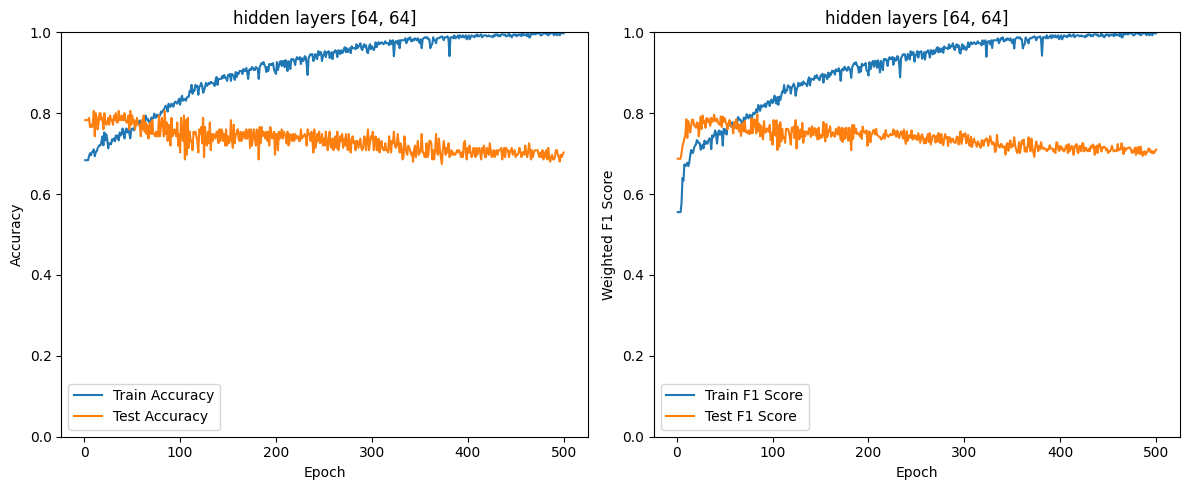

In [82]:
# Use the model architecture of the best model obtained in part (a)
saved_model_info = torch.load('best_model.pth')

input_size = saved_model_info['input_size']
hidden_sizes = saved_model_info['hidden_sizes']
output_sizes = saved_model_info['output_size']

hidden_layer_options = [hidden_sizes]

# Train the model without balancing training set
results_5d_plain = train_and_evaluate(
    input_size, hidden_layer_options, output_size,
    X_train_standardized, y_train, X_test_standardized,
    y_test, 'model_5d_plain.pth'
)

evaluate_model_on_testset('model_5d_plain.pth', X_test_standardized, y_test)

plot_performances(results_5d_plain)

**Balance via oversampling**

Class 0: 279 samples
Class 1: 279 samples


Training and evaluating model with hidden layer sizes: [64, 64]
Done!

Best model hidden layers settings: [64, 64]

Test Accuracy of Non-Liver Patient: 68% (26/38)
Test Accuracy of Liver Patient: 75% (104/137)
Test Accuracy (Overall): 74% (130/175)

F1 Score for Non-Liver Patient: 0.536082
F1 Score for Liver Patient: 0.822134
Weighted F1 Score: 0.760020

                   precision    recall  f1-score   support

Non-Liver Patient   0.440678  0.684211  0.536082        38
    Liver Patient   0.896552  0.759124  0.822134       137

         accuracy                       0.742857       175
        macro avg   0.668615  0.721667  0.679108       175
     weighted avg   0.797562  0.742857  0.760020       175



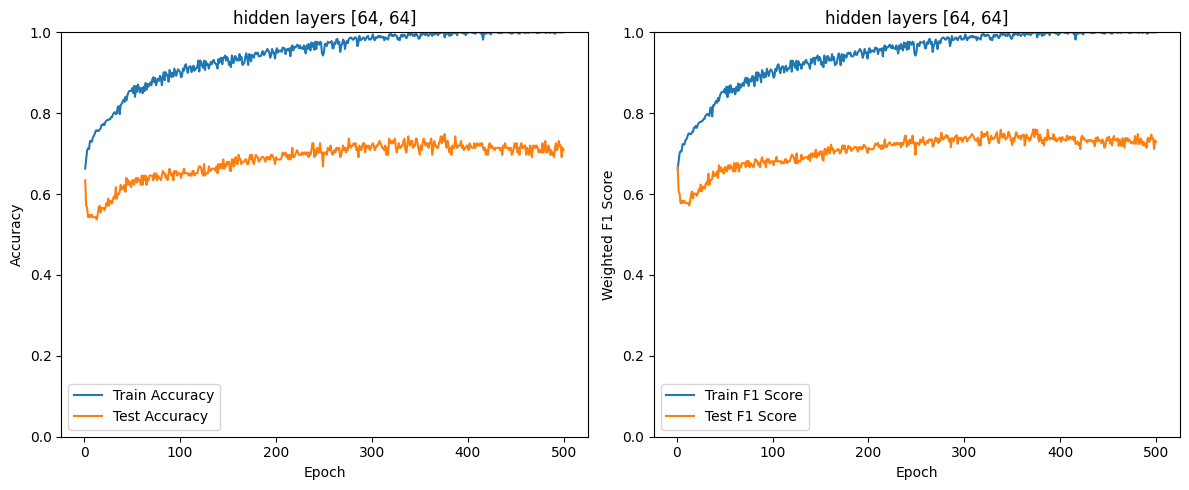

In [87]:
# Initialize oversampler
ros = RandomOverSampler(random_state=21)
# Perform oversampling on the training data
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
# Perform standardization
scaler_over = StandardScaler()
X_train_over_standardized = scaler_over.fit_transform(X_train_over)

check_class_distribution(y_train_over)
print('\n')

results_5d_over = train_and_evaluate(
    input_size, hidden_layer_options, output_size,
    X_train_over_standardized, y_train_over, X_test_standardized,
    y_test, 'model_5d_over.pth'
)

evaluate_model_on_testset('model_5d_over.pth', X_test_standardized, y_test)

plot_performances(results_5d_over)

**Balance via undersampling**

Class 0: 129 samples
Class 1: 129 samples


Training and evaluating model with hidden layer sizes: [64, 64]
Done!

Best model hidden layers settings: [64, 64]

Test Accuracy of Non-Liver Patient: 76% (29/38)
Test Accuracy of Liver Patient: 62% (85/137)
Test Accuracy (Overall): 65% (114/175)

F1 Score for Non-Liver Patient: 0.487395
F1 Score for Liver Patient: 0.735931
Weighted F1 Score: 0.681963

                   precision    recall  f1-score   support

Non-Liver Patient   0.358025  0.763158  0.487395        38
    Liver Patient   0.904255  0.620438  0.735931       137

         accuracy                       0.651429       175
        macro avg   0.631140  0.691798  0.611663       175
     weighted avg   0.785645  0.651429  0.681963       175



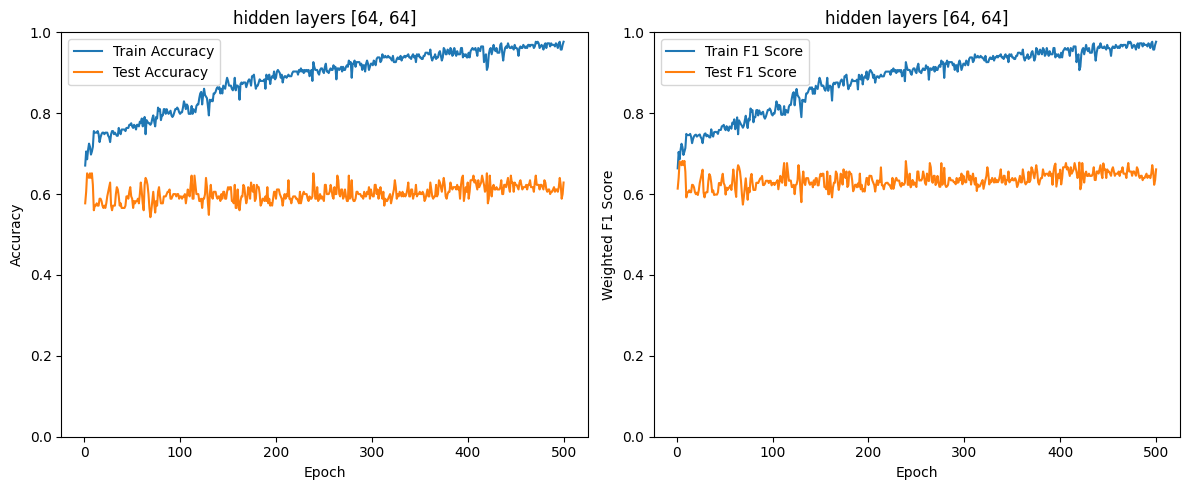

In [88]:
# Initialize undersampler
rus = RandomUnderSampler(random_state=21)
# Perform undersampling on the training data
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
# Perform standardization
scaler_under = StandardScaler()
X_train_under_standardized = scaler_under.fit_transform(X_train_under)

check_class_distribution(y_train_under)
print('\n')

results_5d_under = train_and_evaluate(
    input_size, hidden_layer_options, output_size,
    X_train_under_standardized, y_train_under, X_test_standardized,
    y_test, 'model_5d_under.pth'
)

evaluate_model_on_testset('model_5d_under.pth', X_test_standardized, y_test)

plot_performances(results_5d_under)

Even though both oversampling and undersampling intend to balance training dataset and reduce the bias towards the majority class, they have their differences. On one hand, oversampling can prevent the loss of information due to its preservation of all data samples. However, additional noise might be introduced during training, especially when the minority class instances being duplicated are themselves noisy or outliers. This can further confuse the model during training. On the other hand, undersampling can result in loss of information when the removed instance contain important patterns that model can potentially benefit from. However, the reduction in dataset size also reduce teh computational burden, which results in faster training.

During our training, the first thing I noticed was that the training speed has improved when undersampling technique was used. In addition, during my experiments, I found that the best model obtained from training with undersampling or oversampling techniques is capable of making more balanced correct predictions between two classes than the best model trained without balancing the dataset, despite a decrease in overall test accuracy.

# Training and evaluation (e)

In [89]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import joblib
from matplotlib.colors import ListedColormap

**Best model Assignment 2**

I consider the model trained with standardized data and with oversampling technique as the best model, as it makes predictions that are less biased towards the majority class.

In [90]:
# Use the best model obtained in previous questions
saved_model_info = torch.load('model_5d_over.pth')

# Reinitialize the model using the saved architecture details
best_model = FullyConnectedNN(saved_model_info['input_size'],
                        saved_model_info['hidden_sizes'],
                        saved_model_info['output_size'])

# Load the state dictionary into the model
best_model.load_state_dict(saved_model_info['state_dict'])

<All keys matched successfully>

**Best model Assignment 1**

The best model I obtained in Assignment 1 is SVM model trained without any preprocessing technique.

In [91]:
# Load the model
svm_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/ECE1513/SVM_best_model.pkl')

**Plot projected data points and decision boundaries for both models**

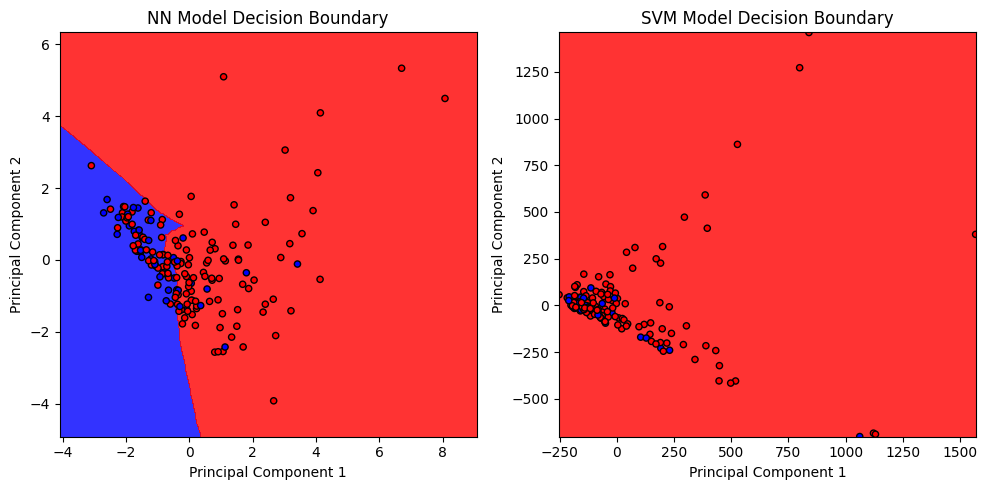

In [92]:
# For the neural network model
pca_nn = PCA(n_components=2)
standardized_data_reduced = pca_nn.fit_transform(X_test_standardized)

# Generate a grid of points to plot
x_min_nn, x_max_nn = standardized_data_reduced[:, 0].min() - 1, standardized_data_reduced[:, 0].max() + 1
y_min_nn, y_max_nn = standardized_data_reduced[:, 1].min() - 1, standardized_data_reduced[:, 1].max() + 1
xx_nn, yy_nn = np.meshgrid(np.linspace(x_min_nn, x_max_nn, 500),
                           np.linspace(y_min_nn, y_max_nn, 500))

# Transform the grid using the inverse PCA transformation to project it back to
# the original feature space
grid_nn = np.c_[xx_nn.ravel(), yy_nn.ravel()]
grid_original_nn = pca_nn.inverse_transform(grid_nn)

# Convert the grid array to a tensor for the NN model
grid_tensor_nn = torch.FloatTensor(grid_original_nn)

# Make predictions over the entire grid
best_model.eval()
with torch.no_grad():
    outputs = best_model(grid_tensor_nn).numpy()

predictions_nn = (outputs > 0.5).astype(int)
predictions_nn = predictions_nn.reshape(xx_nn.shape)


# For the SVM model
pca_svm = PCA(n_components=2)
# Use non-standardized data since svm in assignment 1 is trained without standardization
data_reduced = pca_svm.fit_transform(X_test)

# Generate a grid of points to plot (using the PCA range for the SVM)
x_min_svm, x_max_svm = data_reduced[:, 0].min() - 1, data_reduced[:, 0].max() + 1
y_min_svm, y_max_svm = data_reduced[:, 1].min() - 1, data_reduced[:, 1].max() + 1
xx_svm, yy_svm = np.meshgrid(np.linspace(x_min_svm, x_max_svm, 500),
                             np.linspace(y_min_svm, y_max_svm, 500))

# Transform the grid using the inverse PCA transformation to project it back to
# the original feature space
grid_svm = np.c_[xx_svm.ravel(), yy_svm.ravel()]
grid_original_svm = pca_svm.inverse_transform(grid_svm)

# Make predictions over the entire grid using the SVM model
predictions_svm = svm_model.predict(grid_original_svm).reshape(xx_svm.shape)


# Plot the decision boundaries
plt.figure(figsize=(10, 5))

# Define levels for contour based on the binary classification
# all areas with prediction 0 are filled with one color as all values are
# greater than -1 and up to 0, and all areas with prediction 1 are filled with
# another color as all values are greater than 0 and up to 1.
levels = [-1, 0, 1]

# Define specific colors for each class
boundary_colors = ['blue', 'red']

# Create a custom colormap for the scatter plot to match boundary colors
custom_cmap = ListedColormap(boundary_colors)

# Plot decision boundary for neural network model
plt.subplot(1, 2, 1)
plt.contourf(xx_nn, yy_nn, predictions_nn, levels=levels, colors=boundary_colors, alpha=0.8)
plt.scatter(standardized_data_reduced[:, 0], standardized_data_reduced[:, 1], c=y_test, edgecolors='k', s=20, cmap=custom_cmap)
plt.title("NN Model Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot decision boundary for SVM model
plt.subplot(1, 2, 2)
plt.contourf(xx_svm, yy_svm, predictions_svm, levels=levels, colors=boundary_colors, alpha=0.8)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=y_test, edgecolors='k', s=20, cmap=custom_cmap)
plt.title("SVM Model Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Show the plot with both decision boundaries
plt.tight_layout()
plt.show()

The data point distributions in the decision boundary plots for the neural network and SVM appear different because our neural network model requires standardized input, whereas the SVM model does not.

The figure presented illustrates that the SVM model categorizes all samples into the liver patient class, as shown by the absence of a discernible decision boundary in the plot. On the other hand, the neural network model provides a more nuanced classification between the two classes, as indicated by its decision boundary, which actively attempts to distinguish the two classes.